<div style='padding: 0px ; background-size: cover ; border-radius: 5px ; height: 250px'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">Applied Seismology</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Lab: CAN P</div>
        </div>
    </div>
</div>

In [1]:
# Preparation for programming
# Make sure to execute this cell first!
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')                  # do not show warnings
from __future__ import print_function
from scipy import interpolate, signal
from time import *
from obspy import *
from obspy.core import read, UTCDateTime
from obspy.clients.fdsn import Client
from obspy.signal.cross_correlation import xcorr_pick_correction
import numpy as np
import matplotlib.pylab as plt
import os
import glob
import wave
import struct
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['lines.linewidth'] = 1

1 Trace(s) in Stream:
G.CAN..LHZ | 2004-12-25T23:58:53.690000Z - 2004-12-26T03:58:52.690000Z | 1.0 Hz, 14400 samples


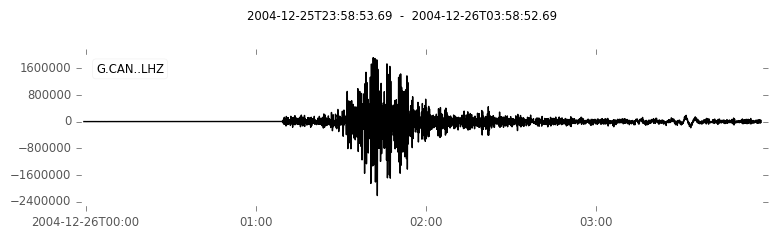

In [2]:
# Getting the waveforms

client = Client("IRIS")
t = UTCDateTime("2004-12-26T00:58:53.0")
starttime = t-(1*3600) # 1 hr before the earthquake
endtime = t+(3*3600) # 3 hrs after the earthquake

st = client.get_waveforms("G", "CAN", "*", "LHZ", starttime, endtime, attach_response=True)
print(st)

st.plot()

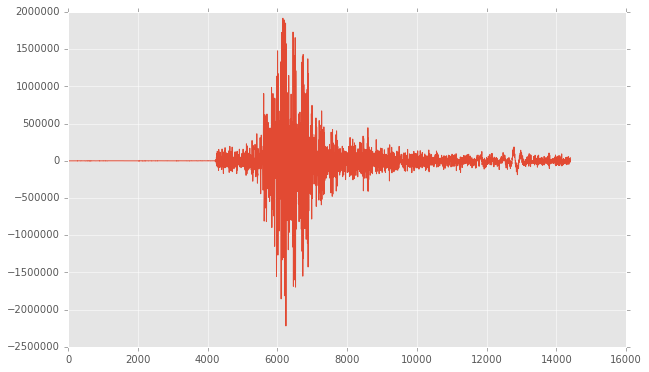

In [3]:
# Plotting signals
tr = st[0]
trace_data = tr.data
plt.plot(tr.data)

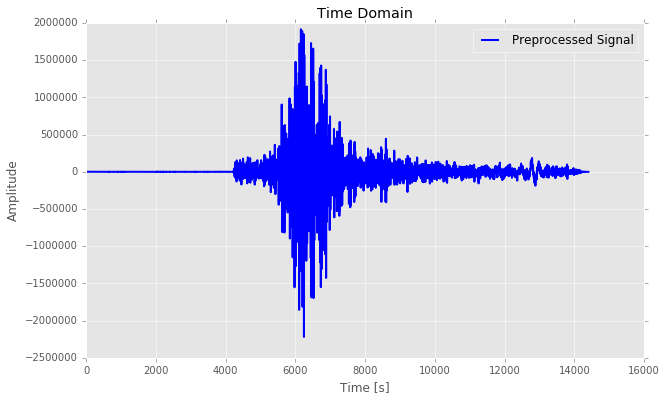

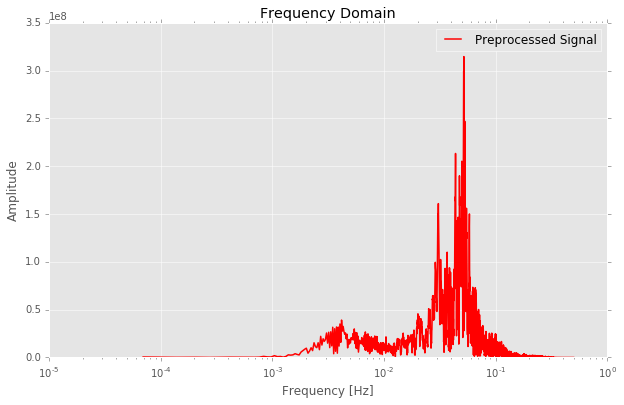

In [4]:
#Pre-Process Data 
from obspy.signal.filter import lowpass
from matplotlib.mlab import detrend
from obspy.signal.invsim import cosine_taper 

# take a copy of the stream to avoid overwriting the original data
can = st.copy()

# Choosing the 1st stream, Specify sampling parameters and Nyquist frequency
npts = can[0].stats.npts              # number of samples
df = can[0].stats.sampling_rate       # sampling rate
nsec = npts/df                        # sampling time
fNy = df / 2.0                        # Nyquist frequency
time = np.linspace(0,nsec,(nsec*df))  # time axis for plotting

y  = can[0].data                      # set up signal   

# Taper
taper_percentage = 0.1                          # Percentage of tapering applied to signal
taper = cosine_taper(npts,taper_percentage)    # Define cosine taper to be used
y_taper = y * taper                         # Taper signal

# Detrend Signal
y_detrend = detrend(y_taper, 'linear')

# Frequency Domain
y_fnew = np.fft.rfft(y_detrend) 

# Plot the result
# Plot in Time Domain
freq = np.linspace(0, fNy, len(y_fnew))         # Frequency axis for plotting
plt.plot(time, y_detrend, 'b', label="Preprocessed Signal", lw=2) 
plt.legend()
plt.title('Time Domain')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
#See P-wave arrival time (at time 4222)
#plt.xlim(4210,4300)
#plt.ylim(-2000,2000)
plt.show()

# Plot in Frequency Domain (Frequency Spectrum)
plt.semilogx(freq, abs(y_fnew), 'r', label="Preprocessed Signal", lw=1.5) 
plt.legend()
plt.title('Frequency Domain')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
#plt.xlim(1E-6, 1E-4) # limited to lower frquencies
plt.show()

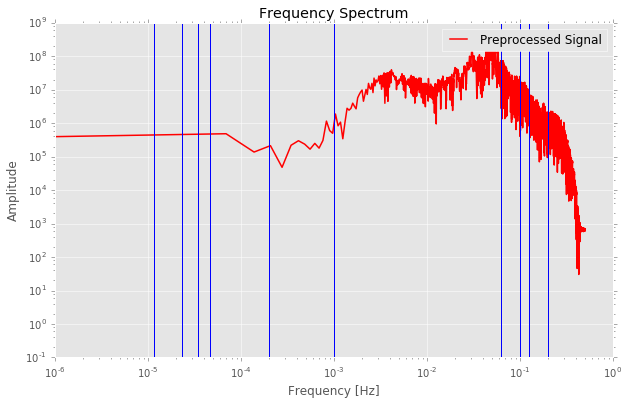

In [5]:
# Set up frequency windows
f0 = 1/(24*3600)
k1 = 1*f0
k2 = 2*f0
k3 = 3*f0
k4 = 4*f0
k5 = 1E-3
k6 = 2E-4

# two ocean microseism frequency intervals (5-8s and 10-16s)
k7 = 1/5
k8 = 1/8
k9 = 1/10
k10 = 1/16

# Plot frequency domain in log-log scale
plt.semilogx(freq, abs(y_fnew), 'r', label="Preprocessed Signal", lw=1.5) 
plt.axvline(k1, color ='b')
plt.axvline(k2, color ='b')
plt.axvline(k3, color ='b')
plt.axvline(k4, color ='b')
plt.axvline(k5, color ='b')
plt.axvline(k6, color ='b')
plt.axvline(k7, color ='b')
plt.axvline(k8, color ='b')
plt.axvline(k9, color ='b')
plt.axvline(k10, color ='b')
plt.legend()
plt.title('Frequency Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1E-6,1)
plt.ylim(1E-1,1E9)
plt.show()